# Overview:  HW3 - Question 4

In this coding question, you'll implement a classifier with logistic regression
$$ F(w) = \frac{1}{N} \sum_{i=1}^N \log( 1 + e^{-\langle w, x_i \rangle y_i} ). $$

For this problem, I would suggest using functions to prepare the dataset, run gradient descent, and return classification error.  By doing this, you only have to write the code one time and just use the functions to return results for part (4c).

# Loading MNIST Data

In this section, you will learn to load MNIST data.  If you do not have tensorflow available on your jupyter notebook, uncomment the next cell, run it, restart the kernel, and comment the next cell once more.

In [1]:
#!pip3 install sklearn

In [2]:
# import statements
#import statements
import pandas as pd
#import certifi
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from IPython.display import clear_output
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml

In [3]:
# this cell will take a minute to run depending on your internet connection
X, y = fetch_openml('mnist_784', version=1, return_X_y=True) # getting data from online
print('X shape:', X.shape, 'y shape:', y.shape)

C:\Users\govinda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


X shape: (70000, 784) y shape: (70000,)


In [4]:
# this cell processes some of the data
digits = {j:[] for j in range(10)}
X_np = X.to_numpy()

for j in range(len(y)): # takes data assigns it into a dictionary
    digits[int(y[j])].append(X_np[j].reshape(28,28))

digits = {j:np.stack(digits[j]) for j in range(10)} # stack everything to be one numpy array

for j in range(10):
    print('Shape of data with label', j, ':', digits[j].shape )


Shape of data with label 0 : (6903, 28, 28)
Shape of data with label 1 : (7877, 28, 28)
Shape of data with label 2 : (6990, 28, 28)
Shape of data with label 3 : (7141, 28, 28)
Shape of data with label 4 : (6824, 28, 28)
Shape of data with label 5 : (6313, 28, 28)
Shape of data with label 6 : (6876, 28, 28)
Shape of data with label 7 : (7293, 28, 28)
Shape of data with label 8 : (6825, 28, 28)
Shape of data with label 9 : (6958, 28, 28)


# (4a) Plotting

Display one randomly selected image from your training data for each digit class. Provide the index number for each image.

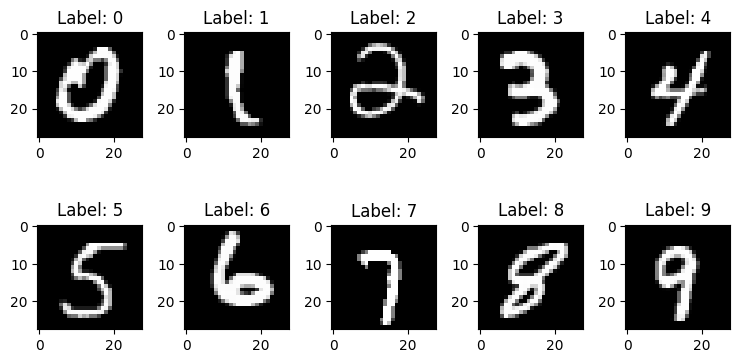

In [5]:
# plot data here (this should have an output)
num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    # select current digit
    curr_digit = digits[i]
    ax.imshow(curr_digit[np.random.randint(curr_digit.shape[0])], cmap='gray')
    ax.set_title('Label: {}'.format(i))
plt.tight_layout()
plt.show()


# (4b) Label data

Select the first 500 examples of 0’s and 1’s for this example, those will form the training data $(x_i , y_i) \in \mathbb{R}^{784} \times \{−1,1\}, i = 1,...,1000$. Assign label $y_i = 1$ for 1s and $y_i = −1$ for 0s.  You can use __np.vectorize__ here.

In [12]:
# create dataset here (essentially just create a numpy array of 1's and -1's for the labels)
# create dataset here (essentially just create a numpy array of 1's and -1's
# for the labels)
def output_data(num1, num2):
    x_train  = np.concatenate([digits[num1][:500].reshape(500,28*28),
                               digits[num2][:500].reshape(500, 28*28)])
    y_train = np.concatenate([np.ones(500), -1*np.ones(500)]).reshape(1000,1)
    x_test = np.concatenate([digits[num1][500:1000].reshape(500,28*28),
                             digits[num2][500:1000].reshape(500,28*28)])
    maxVal = np.max(x_train)
    y_test = y_train
    return x_train/maxVal, y_train, x_test/maxVal, y_test

# (4bi) Running Gradient Descent

Implement and run a Gradient Descent algorithm, with step-size $\mu = 10^{-4}$, to optimize the function above associated with this setup. You should run your algorithm for at least $T = 10,000$ iterations, but if your computer can handle it try $T=100,000$ or until a reasonable stopping criterion is satisfied.  Provide a plot showing the value of $F(w)$ at each iteration. Also, feel free to adjust $\mu$ to be larger / smaller if the plot does not match your expectations.

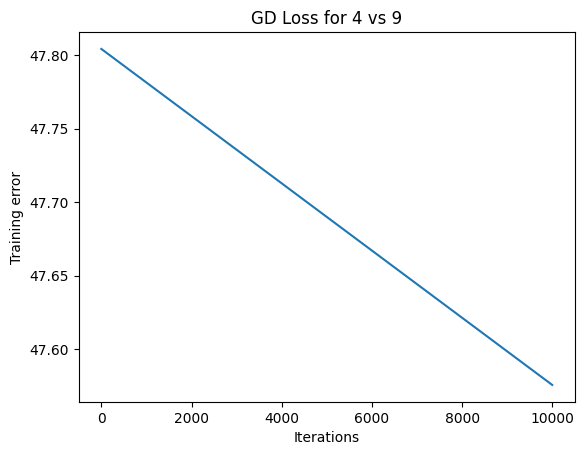

In [14]:
#3a
w = np.random.normal(size=(784,1))
w = np.zeros((784,1))




w = np.ones((784,1))

def gF(w, x_train, y_train):
    expVal = np.exp(-y_train*(x_train @ w))
    grad = (-expVal/(1+expVal))*y_train*x_train
    return grad.transpose().mean(axis=1).reshape((28*28,1))

def F(w, x_train, y_train):
    F = np.log(1+np.exp(-y_train*(x_train @ w))).mean()
    return F

def p(gradient):
    normGrad = np.linalg.norm(gradient, ord = 1)
    return np.sign(gradient) * normGrad




def gradient_descent(w, T=200, mu=1e-4, num1=0, num2=1, plot=True):
    x_train, y_train, x_test, y_test = output_data(num1, num2)
    F_history = []
    for t in range(T):
        F_history.append(F(w, x_train, y_train))
        w = w - mu*p(gF(w, x_train, y_train))
        
        if (t%500) == 0:
            print('Finished', t, 'iterations...')
            clear_output(wait=True)
    # w = w/mu/10
    if plot:
        plt.plot(range(T), F_history)
        plt.xlabel('Iterations')
        plt.ylabel('Training error')
        plt.title('GD Loss for ' + str(num1) + ' vs ' + str(num2))
    
    return w, F_history, x_train, y_train, x_test, y_test

T_max = 10000

w_star, F_hist, x_train, y_train, x_test, y_test = gradient_descent(w, T=T_max, mu=1e-8, num1=4, num2=9, plot=True)






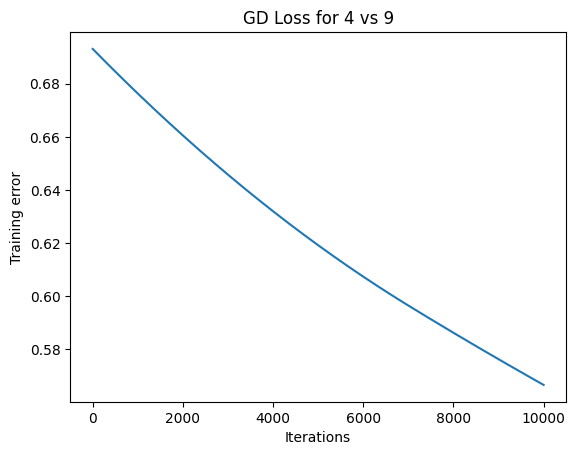

In [20]:
#3b

# Initialize weight vector w to zero vector as per L1 gradient descent requirements
w = np.zeros((784,1))

# Gradient of the loss function F
def gF(w, x_train, y_train):
    expVal = np.exp(-y_train*(x_train @ w))
    grad = (-expVal/(1+expVal))*y_train*x_train
    return grad.mean(axis=0).reshape((-1,1))  

def F(w, x_train, y_train):
    return np.log(1+np.exp(-y_train*(x_train @ w))).mean()

def L1_step(gradient):
    j_star = np.argmax(np.abs(gradient))  
    step = np.zeros_like(gradient)  
    step[j_star] = np.sign(gradient[j_star])
    return step


def gradient_descent(w, T=200, mu=1e-4, num1=0, num2=1, plot=True):
    x_train, y_train, x_test, y_test = output_data(num1, num2)
    F_history = []
    non_zero_entry_tracker = np.zeros_like(w)
    
    for t in range(T):
        F_history.append(F(w, x_train, y_train))
        gradient = gF(w, x_train, y_train)
        p = L1_step(gradient)
        non_zero_entry_tracker += p 
        w = w - mu * L1_step(gradient)  
        
        if (t%500) == 0 or t == T - 1:
            print('Finished', t, 'iterations...')
            clear_output(wait=True)
    
    if plot:
        plt.plot(range(T), F_history)
        plt.xlabel('Iterations')
        plt.ylabel('Training error')
        plt.title('GD Loss for ' + str(num1) + ' vs ' + str(num2))
    
    return w, F_history, x_train, y_train, x_test, y_test, non_zero_entry_tracker

T_max = 10000  
w_star, F_hist, x_train, y_train, x_test, y_test,non_zero_entry_tracker = gradient_descent(w, T=T_max, mu=1e-4 , num1=4, num2=9, plot=True)




3c
Compare these two descent plots of F(w), along with the analogous plot
for gradient descent from HW3. Which performs best, and do you have an
argument for why? Do you think the performance would change with different
step sizes?

3(b) F(w) seemed decrease error rate exponetially I think the performance changes for different step sizes

meanwhile 3(a) seemed to decrease the error rate linearily 
stays the same for different step sizes

from hw 3
in comparission the error rate starts declining alot ealier in the iterartions so less computation has to be done to reach the optimal point



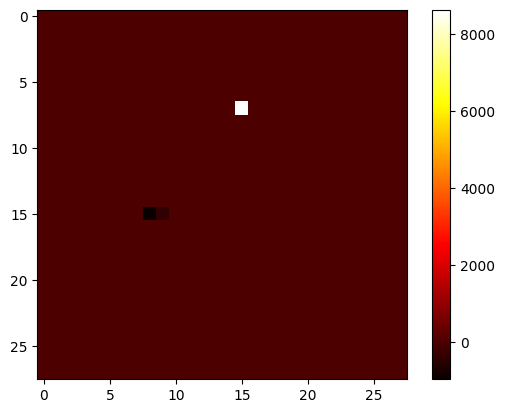

In [21]:
#3d
tracker_image = non_zero_entry_tracker.reshape(28, 28)
plt.imshow(tracker_image, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()


3D) I think they are different as the algorithmn is determinng unique points to determine that they are different.  the pixels correspond to the more distinctive features between the digits 4 and 9.

In [8]:
# Classify and return the classification error
# Classify and return the classification error
# Classify and return the classification error
def classify(w, x, y):
    pred = np.sign(np.dot(x, w))
    error_rate = np.sum(np.array(pred) < 0) / len(pred)
    return pred, error_rate

# classification error rate

pred_train, e_rate_train = classify(w_star, x_train, y_train)
pred_test, e_rate_test = classify(w_star, x_test, y_test)
print('Training error rate:', e_rate_train)
print('Test error rate:', e_rate_test)


Training error rate: 0.0
Test error rate: 0.0


# (4c) Repeat with 4s and 9s

Repeat parts (b)i. and (b)iii. for digits of 4s and 9s. Comment on the difference between the results and propose a reason as to why the performance did or did not change.

Training error rate: 0.0
Test error rate: 0.0


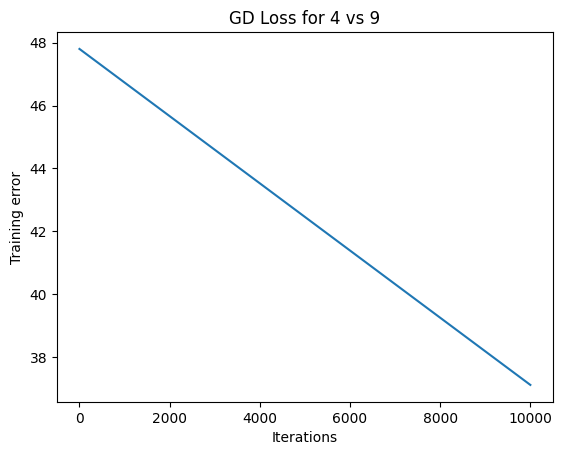

In [9]:
# Repeat here
# Repeat here
w = np.ones((784,1))
w_star, F_hist, x_train, y_train, x_test, y_test = gradient_descent(w, T=T_max, mu=1e-4, num1=4, num2=9)

pred_train, e_rate_train = classify(w_star, x_train, y_train)
pred_test, e_rate_test = classify(w_star, x_test, y_test)
print('Training error rate:', e_rate_train)
print('Test error rate:', e_rate_test)